Exp 4: TO EXPLORE AND IMPLIMENT PCA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#STEP 1: DATSET
data = np.array([
    [1.0, 1.2, 0.8],
    [2.1, 2.3, 1.9],
    [0.5, 0.6, 0.4],
    [3.0, 3.1, 2.9],
    [1.5, 1.6, 1.4],
    [2.5, 2.6, 2.4],
    [0.8, 0.9, 0.7],
    [3.5, 3.6, 3.4],
    [1.2, 1.3, 1.1],
    [2.8, 2.9, 2.7]
])

In [ ]:
#step 2: Standardization using pandas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[-0.90792696 -0.83152401 -0.9818035 ]
 [ 0.21422996  0.29770613  0.13158191]
 [-1.41799828 -1.44746773 -1.38667093]
 [ 1.13235834  1.11896441  1.14375047]
 [-0.39785563 -0.42089487 -0.37450237]
 [ 0.62228701  0.60567798  0.63766619]
 [-1.11195548 -1.13949587 -1.08302036]
 [ 1.64242966  1.63225084  1.64983475]
 [-0.70389843 -0.72886673 -0.67815294]
 [ 0.92832981  0.91364984  0.94131676]]


In [ ]:
#step 3: Covariance matrix
cov_matrix = np.cov(scaled_data.T)
print(cov_matrix)

[[1.11111111 1.11020216 1.1102275 ]
 [1.11020216 1.11111111 1.10752759]
 [1.1102275  1.10752759 1.11111111]]


In [ ]:
#Step 4: Eigen decomposition
from numpy import linalg

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[3.32974976e+00 4.59825127e-17 3.58357710e-03]

Eigenvectors:
[[ 0.57766086  0.81627008  0.00332968]
 [ 0.57719271 -0.40557858 -0.70876977]
 [ 0.57719711 -0.41135042  0.70543201]]


In [ ]:
#Step 5: Sort eigenvalues and eigen vectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("Sorted Eigenvalues:")
print(sorted_eigenvalues)
print("\nSorted Eigenvectors:")
print(sorted_eigenvectors)

Sorted Eigenvalues:
[3.32974976e+00 3.58357710e-03 4.59825127e-17]

Sorted Eigenvectors:
[[ 0.57766086  0.00332968  0.81627008]
 [ 0.57719271 -0.70876977 -0.40557858]
 [ 0.57719711  0.70543201 -0.41135042]]


In [ ]:
#step 6 : Select top 2 eigenvectors
num_components = 2
principal_components = sorted_eigenvectors[:, :num_components]
print("Top 2 Principal Components (Eigenvectors):")
print(principal_components)


Top 2 Principal Components (Eigenvectors):
[[ 0.57766086  0.00332968]
 [ 0.57719271 -0.70876977]
 [ 0.57719711  0.70543201]]


In [ ]:
#STEP 7: Project data to new basis
projected_data = scaled_data.dot(principal_components)
print("\nProjected Data:")
print(projected_data)


Projected Data:
[[-1.57111761 -0.10625964]
 [ 0.37153477 -0.11746969]
 [-2.45497238  0.04299783]
 [ 1.96014666  0.01752044]
 [-0.68892476  0.03280687]
 [ 1.07712285  0.02261592]
 [-1.9251581   0.03994054]
 [ 2.84317047  0.01242496]
 [-1.21873905  0.03586416]
 [ 1.60693714  0.01955863]]


In [ ]:
#STEP 8: OUTPUT THE REDUCED DATA

reduced_data = pd.DataFrame(projected_data, columns=['PC1', 'PC2'])
print("\nReduced Data:")
print(reduced_data)


Reduced Data:
        PC1       PC2
0 -1.571118 -0.106260
1  0.371535 -0.117470
2 -2.454972  0.042998
3  1.960147  0.017520
4 -0.688925  0.032807
5  1.077123  0.022616
6 -1.925158  0.039941
7  2.843170  0.012425
8 -1.218739  0.035864
9  1.606937  0.019559


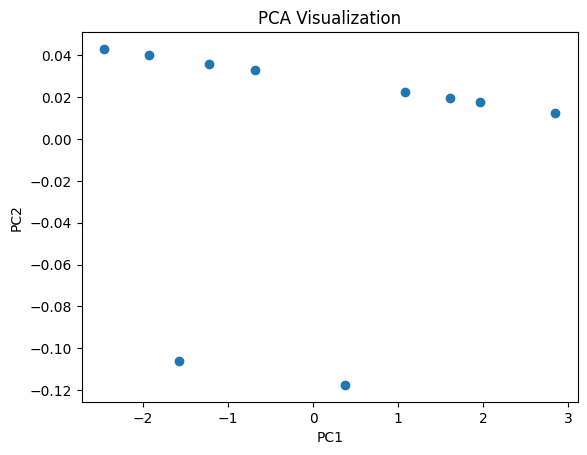

In [ ]:
#Step 9 : Visualize
plt.scatter(reduced_data['PC1'], reduced_data['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.show()